# KNN-Regressor

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**Load Data**

In [2]:
df = pd.read_csv("formated_data.csv")
df.head()

,intern_num,max_sal,min_sal,city,month_num,day,2000+,500-2000,50-500,<50,...,专员,产品,销售,开发,工程师,助理,运营,GDP(billion),GDP per capita,Population(thousand)
0,176,150,100,北京,3,3,1,0,0,0,...,0,0,0,0,0,0,0,3500.0,162518.5736,21536.0
1,390,150,120,北京,3,5,1,0,0,0,...,0,0,0,0,0,0,0,3500.0,162518.5736,21536.0
2,44,300,150,北京,5,4,1,0,0,0,...,0,0,0,1,1,0,0,3500.0,162518.5736,21536.0
3,486,200,150,北京,4,5,1,0,0,0,...,0,0,0,0,0,1,0,3500.0,162518.5736,21536.0
4,390,150,100,北京,3,5,1,0,0,0,...,0,0,0,0,0,0,1,3500.0,162518.5736,21536.0


**Splitting the data**

In [3]:
row_num = len(df)
col_num = len(df.iloc[0,:].to_numpy())
X_1 = df.iloc[:,4:10].to_numpy().reshape(row_num,6)
X_2 = df.iloc[:,66:].to_numpy().reshape(row_num,col_num-66)
X = np.hstack((X_1,X_2))
y = df.iloc[:,1:3].to_numpy().reshape(row_num,2)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_max_train = y_train[:,0].reshape(len(y_train),1)
y_max_test = y_test[:,0].reshape(len(y_test),1)
y_min_train = y_train[:,1].reshape(len(y_train),1)
y_min_test = y_test[:,1].reshape(len(y_test),1)

**Standardizing the data**

In [60]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_max_scaler = MinMaxScaler()
y_min_scaler = MinMaxScaler()
X_scaler.fit_transform(X_train)
X_scaler.transform(X_test)
y_max_scaler.fit_transform(y_max_train)
y_max_scaler.transform(y_max_test)
y_min_scaler.fit_transform(y_min_train)
y_min_scaler.transform(y_min_test)

array([[0.     ],
       [0.125  ],
       [0.125  ],
       [0.15   ],
       [0.15   ],
       [0.1875 ],
       [0.1875 ],
       [0.15   ],
       [0.125  ],
       [0.1875 ],
       [0.125  ],
       [0.15   ],
       [0.1    ],
       [0.25   ],
       [0.125  ],
       [0.125  ],
       [0.125  ],
       [0.15   ],
       [0.15   ],
       [0.1875 ],
       [0.125  ],
       [0.125  ],
       [0.125  ],
       [0.375  ],
       [0.1875 ],
       [0.1875 ],
       [0.1875 ],
       [0.1875 ],
       [0.15   ],
       [0.1    ],
       [0.1    ],
       [0.1    ],
       [0.125  ],
       [0.0625 ],
       [0.125  ],
       [0.1    ],
       [0.0625 ],
       [0.15   ],
       [0.1875 ],
       [0.1875 ],
       [0.15   ],
       [0.125  ],
       [0.1875 ],
       [0.25   ],
       [0.15   ],
       [0.125  ],
       [0.125  ],
       [0.1875 ],
       [0.0625 ],
       [0.1875 ],
       [0.125  ],
       [0.125  ],
       [0.15   ],
       [0.125  ],
       [0.125  ],
       [0.

**Implement Regression with KNN-Regressor**

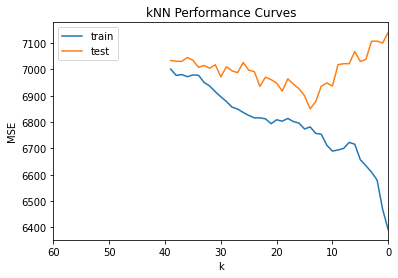

In [61]:
from sklearn.neighbors import KNeighborsRegressor
train_mse = []
test_mse = []
for i in range(10,50):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_max_train)
    y_train_predicted = model.predict(X_train)
    mse = np.mean(np.power(y_train_predicted-y_max_train,2))
    train_mse.append(mse)
    y_test_predicted = model.predict(X_test)
    mse = np.mean(np.power(y_test_predicted-y_max_test,2))
    test_mse.append(mse)
    
plt.figure();
plt.plot(train_mse,label="train")
plt.plot(test_mse,label="test")
plt.gca().set(
    title="kNN Performance Curves",
    xlabel="k",
    ylabel="MSE",
    xlim=(60,0)
);
plt.legend();


    

In [7]:
np.mean(np.power(y_max_train.mean()-y_max_test,2))

7859.297992671487

In [8]:
y_max_train.mean(), y_max_test.mean()

(185.9465591126796, 185.0735887096774)

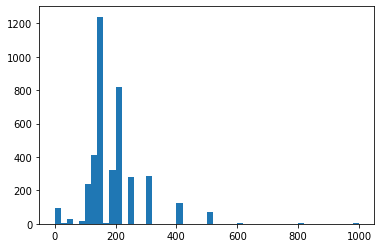

In [11]:
plt.hist(y_max_train, bins=50);

In [ ]:
y_max_train-y_min_train